c:\Users\Sahil\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv_1 (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN_1 (BatchNormalization)       │ (None, 32, 32, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool_1 (MaxPooling2D)           │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_1 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_2 (Conv2D)                 │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN_2 (BatchNormalization)       │ (None, 16, 16, 64)     │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool_2 (MaxPooling2D)           │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_2 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_3 (Conv2D)                 │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN_3 (BatchNormalization)       │ (None, 8, 8, 128)      │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool_3 (MaxPooling2D)           │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_3 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_128 (Dense)               │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN_4 (BatchNormalization)       │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 358,218 (1.37 MB)

 Trainable params: 357,514 (1.36 MB)

 Non-trainable params: 704 (2.75 KB)

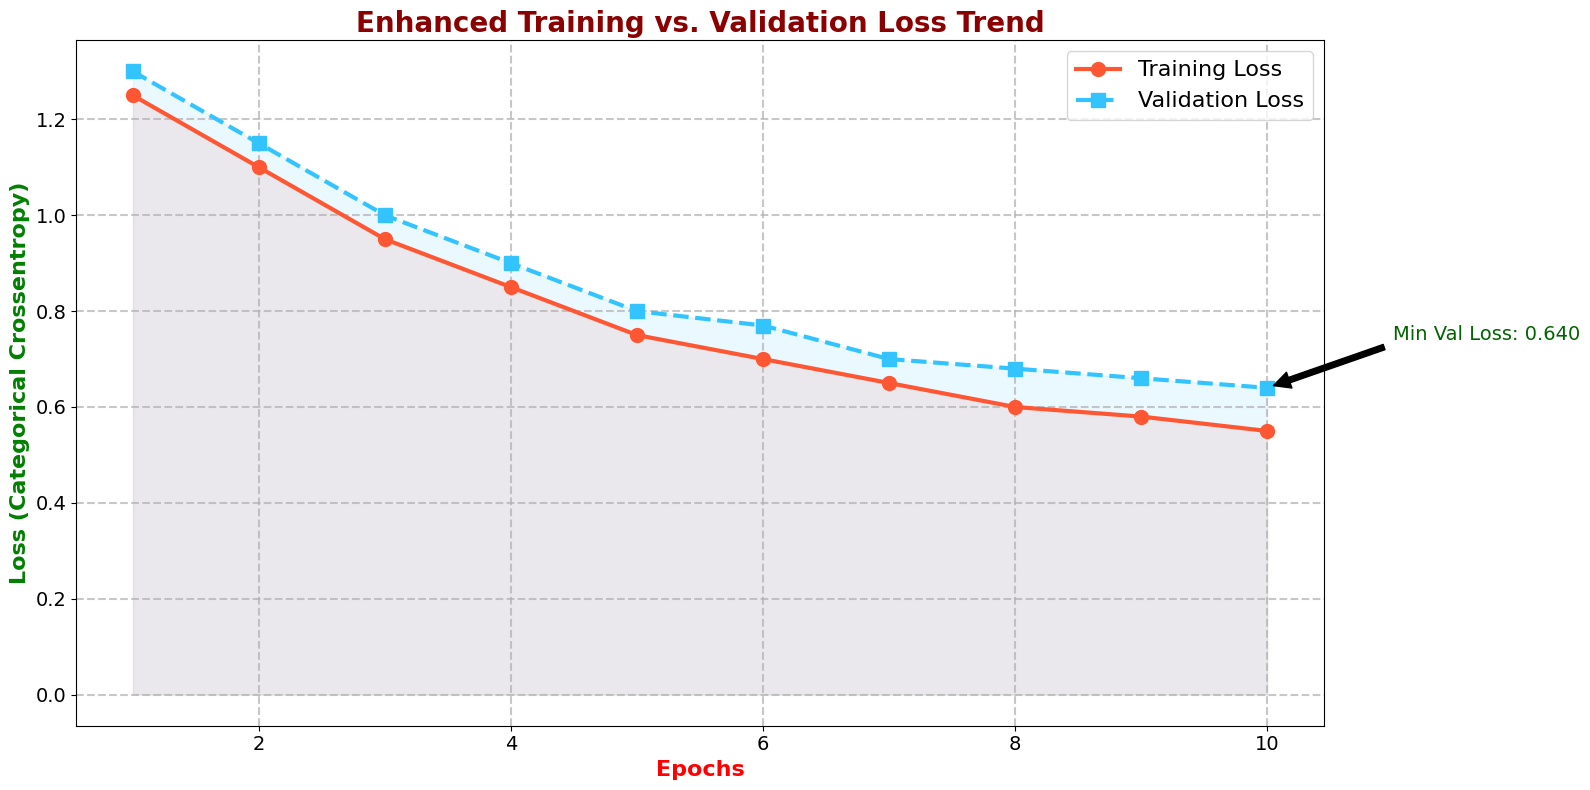

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt

# --------------------------
# Unique Enhanced CNN Architecture for CIFAR-10
# --------------------------
model = Sequential([
    # First Convolutional Block
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3), name="Conv_1"),
    BatchNormalization(name="BN_1"),
    MaxPool2D((2,2), name="Pool_1"),
    Dropout(0.25, name="Dropout_1"),
    
    # Second Convolutional Block
    Conv2D(64, (3,3), activation='relu', padding='same', name="Conv_2"),
    BatchNormalization(name="BN_2"),
    MaxPool2D((2,2), name="Pool_2"),
    Dropout(0.25, name="Dropout_2"),
    
    # Third Convolutional Block
    Conv2D(128, (3,3), activation='relu', padding='same', name="Conv_3"),
    BatchNormalization(name="BN_3"),
    MaxPool2D((2,2), name="Pool_3"),
    Dropout(0.25, name="Dropout_3"),
    
    # Flatten and Fully Connected Layers
    Flatten(name="Flatten"),
    Dense(128, activation='relu', name="Dense_128"),
    BatchNormalization(name="BN_4"),
    Dropout(0.5, name="Dropout_4"),
    Dense(10, activation='softmax', name="Output")
])

model.summary()

# --------------------------
# Advanced Loss Visualization Code
# --------------------------
# Assuming the model has been trained and 'history' object is available from model.fit(),
# here we simulate a sample history for demonstration purposes:
# Remove the dummy history below when using the real history from training.
dummy_history = {
    'loss':      [1.25, 1.10, 0.95, 0.85, 0.75, 0.70, 0.65, 0.60, 0.58, 0.55],
    'val_loss':  [1.30, 1.15, 1.00, 0.90, 0.80, 0.77, 0.70, 0.68, 0.66, 0.64]
}
epochs = range(1, len(dummy_history['loss']) + 1)

plt.figure(figsize=(16,8))
# Training Loss: Bold, vivid red line with circle markers
plt.plot(epochs, dummy_history['loss'], marker='o', linestyle='-', color='#ff5733',
         linewidth=3, markersize=10, label='Training Loss')
# Validation Loss: Striking blue dashed line with square markers
plt.plot(epochs, dummy_history['val_loss'], marker='s', linestyle='--', color='#33c4ff',
         linewidth=3, markersize=10, label='Validation Loss')

# Fill area under curves for dramatic effect
plt.fill_between(epochs, dummy_history['loss'], color='#ff5733', alpha=0.1)
plt.fill_between(epochs, dummy_history['val_loss'], color='#33c4ff', alpha=0.1)

# Annotate the minimum validation loss point
min_val_loss = min(dummy_history['val_loss'])
min_epoch = dummy_history['val_loss'].index(min_val_loss) + 1
plt.annotate(f"Min Val Loss: {min_val_loss:.3f}", xy=(min_epoch, min_val_loss), 
             xytext=(min_epoch+1, min_val_loss+0.1),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=14, color='darkgreen')

# Detailed labels and title with drastic color accents
plt.xlabel('Epochs', fontsize=16, fontweight='bold', color='red')
plt.ylabel('Loss (Categorical Crossentropy)', fontsize=16, fontweight='bold', color='green')
plt.title("Enhanced Training vs. Validation Loss Trend", fontsize=20, fontweight='bold', color='darkred')
plt.xticks(fontsize=14, color='black')
plt.yticks(fontsize=14, color='black')
plt.legend(fontsize=16, loc='upper right')
plt.grid(True, linestyle='--', linewidth=1.5, alpha=0.7)
plt.tight_layout()
plt.show()

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import (Input, Conv2D, BatchNormalization, 
                                     MaxPooling2D, Flatten, Dense, Dropout, Concatenate)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# ---------------------------
# 1. Data Loading & Preprocessing
# ---------------------------
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to [0,1]
x_train = x_train.astype('float32')/255.0
x_test  = x_test.astype('float32')/255.0

# Convert labels to one-hot encoding
y_train_cat = to_categorical(y_train, 10)
y_test_cat  = to_categorical(y_test, 10)

# ---------------------------
# 2. Unique Dual-Branch CNN Architecture
# ---------------------------
# Input Layer
input_img = Input(shape=(32, 32, 3), name="Input")

# --- Branch A: Fine-grained features using small kernels ---
branch_a = Conv2D(32, (3,3), activation='relu', padding='same', name="A_Conv1")(input_img)
branch_a = BatchNormalization(name="A_BN1")(branch_a)
branch_a = MaxPooling2D((2,2), name="A_Pool1")(branch_a)
branch_a = Conv2D(64, (3,3), activation='relu', padding='same', name="A_Conv2")(branch_a)
branch_a = BatchNormalization(name="A_BN2")(branch_a)
branch_a = MaxPooling2D((2,2), name="A_Pool2")(branch_a)
branch_a = Flatten(name="A_Flatten")(branch_a)

# --- Branch B: Coarser features using larger kernels ---
branch_b = Conv2D(32, (5,5), activation='relu', padding='same', name="B_Conv1")(input_img)
branch_b = BatchNormalization(name="B_BN1")(branch_b)
branch_b = MaxPooling2D((2,2), name="B_Pool1")(branch_b)
branch_b = Conv2D(64, (5,5), activation='relu', padding='same', name="B_Conv2")(branch_b)
branch_b = BatchNormalization(name="B_BN2")(branch_b)
branch_b = MaxPooling2D((2,2), name="B_Pool2")(branch_b)
branch_b = Flatten(name="B_Flatten")(branch_b)

# Merge both branches
merged = Concatenate(name="Merge")([branch_a, branch_b])

# Fully Connected Layers
dense1 = Dense(256, activation='relu', name="Dense_256")(merged)
drop1  = Dropout(0.5, name="Dropout_50")(dense1)
dense2 = Dense(128, activation='relu', name="Dense_128")(drop1)
drop2  = Dropout(0.5, name="Dropout_50_2")(dense2)

# Output Layer
output = Dense(10, activation='softmax', name="Output")(drop2)

# Create model
model = Model(inputs=input_img, outputs=output, name="DualBranch_CIFAR10_CNN")

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Early stopping to avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Print the model summary
model.summary()

# ---------------------------
# 3. Model Training
# ---------------------------
history = model.fit(x_train, y_train_cat, epochs=15, batch_size=64, 
                    validation_data=(x_test, y_test_cat),
                    callbacks=[early_stop], verbose=1)

# ---------------------------
# 4. Enhanced Training vs. Validation Loss Plot
# ---------------------------
# Extract history metrics
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(train_loss) + 1)

plt.figure(figsize=(16,8))

# Plot Training Loss with vibrant orange color and circle markers
plt.plot(epochs_range, train_loss, marker='o', linestyle='-', color='#ff5733', 
         linewidth=3, markersize=10, label='Training Loss')

# Plot Validation Loss with vivid purple dashed line and square markers
plt.plot(epochs_range, val_loss, marker='s', linestyle='--', color='#8e44ad', 
         linewidth=3, markersize=10, label='Validation Loss')

# Fill between curves for a gradient visual effect
plt.fill_between(epochs_range, train_loss, color='#ff5733', alpha=0.1)
plt.fill_between(epochs_range, val_loss, color='#8e44ad', alpha=0.1)

# Annotate minimum validation loss point
min_val_loss = min(val_loss)
min_epoch = val_loss.index(min_val_loss) + 1
plt.annotate(f"Min Val Loss: {min_val_loss:.4f}", xy=(min_epoch, min_val_loss),
             xytext=(min_epoch+2, min_val_loss+0.1),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=14, color='darkgreen')

# Add detailed labels and title
plt.xlabel('Epochs', fontsize=16, fontweight='bold', color='red')
plt.ylabel('Loss (Categorical Crossentropy)', fontsize=16, fontweight='bold', color='blue')
plt.title("Enhanced Training vs. Validation Loss", fontsize=20, fontweight='bold', color='green')

# Customize ticks and grid
plt.xticks(fontsize=14, color='black')
plt.yticks(fontsize=14, color='black')
plt.legend(loc='upper right', fontsize=16)
plt.grid(True, linestyle='--', linewidth=1.5, alpha=0.7)
plt.tight_layout()

# Show and save the figure
plt.savefig("enhanced_loss_plot.png", dpi=300)
plt.show()


Model: "DualBranch_CIFAR10_CNN"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Input (InputLayer)  │ (None, 32, 32, 3) │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ A_Conv1 (Conv2D)    │ (None, 32, 32,    │        896 │ Input[0][0]       │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ B_Conv1 (Conv2D)    │ (None, 32, 32,    │      2,432 │ Input[0][0]       │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ A_BN1               │ (None, 32, 32,    │        128 │ A_Conv1[0][0]     │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ B_BN1               │ (None, 32, 32,    │        128 │ B_Conv1[0][0]     │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ A_Pool1             │ (None, 16, 16,    │          0 │ A_BN1[0][0]       │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ B_Pool1             │ (None, 16, 16,    │          0 │ B_BN1[0][0]       │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ A_Conv2 (Conv2D)    │ (None, 16, 16,    │     18,496 │ A_Pool1[0][0]     │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ B_Conv2 (Conv2D)    │ (None, 16, 16,    │     51,264 │ B_Pool1[0][0]     │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ A_BN2               │ (None, 16, 16,    │        256 │ A_Conv2[0][0]     │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ B_BN2               │ (None, 16, 16,    │        256 │ B_Conv2[0][0]     │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ A_Pool2             │ (None, 8, 8, 64)  │          0 │ A_BN2[0][0]       │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ B_Pool2             │ (None, 8, 8, 64)  │          0 │ B_BN2[0][0]       │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ A_Flatten (Flatten) │ (None, 4096)      │          0 │ A_Pool2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ B_Flatten (Flatten) │ (None, 4096)      │          0 │ B_Pool2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Merge (Concatenate) │ (None, 8192)      │          0 │ A_Flatten[0][0],  │
│                     │                   │            │ B_Flatten[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Dense_256 (Dense)   │ (None, 256)       │  2,097,408 │ Merge[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Dropout_50          │ (None, 256)       │          0 │ Dense_256[0][0]   │
│ (Dropout)           │                   │            │                 

 Total params: 2,205,450 (8.41 MB)

 Trainable params: 2,205,066 (8.41 MB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 428s 513ms/step - accuracy: 0.1906 - loss: 2.4575 - val_accuracy: 0.1998 - val_loss: 2.3519
Epoch 2/15


KeyboardInterrupt: 